# Predicting Red Hat Business Value - Classify customer potential

## 1. Background
<br>Like most companies, Red Hat is able to gather a great deal of information over time about the behavior of individuals who interact with them. They’re in search of better methods of using this behavioral data to predict which individuals they should approach—and even when and how to approach them.<br/>
<br>In this project, the challenge is to create a classification algorithm that accurately identifies which customers have the most potential business value for Red Hat based on their characteristics and activities.<br/>
<br>With an improved prediction model in place, Red Hat will be able to more efficiently prioritize resources to generate more business and better serve their customers.<br/>

## 2. Protential clients
<br>The protential client in this project is definitely the Red Hat. With the data Red Hat, a predictive model can be built based on the features in this data set. This model can be used for predicting protential business of a person who has performed a specific activity in future cases. <br/>
<br>Other companies may use this model as well. With similar data architecture, the model could predict for any classification problem in business. What it needs is to re-train the model to fit the new data architecture.<br/>

## 3. Datasets Description, Exploration and Wrangling
<br>The data set is coming from Kaggle Competition - 'Predicting Red Hat Business Value'. This competition uses two separate data files that may be joined together to create a single, unified data table: a people file and an activity file.<br/>
<br>The people file contains all of the unique people (and the corresponding characteristics) that have performed activities over time. Each row in the people file represents a unique person. Each person has a unique people_id.<br/>
<br>The activity file contains all of the unique activities (and the corresponding activity characteristics) that each person has performed over time. Each row in the activity file represents a unique activity performed by a person on a certain date. Each activity has a unique activity_id.<br/>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder

* The activity file contains several different categories of activities. As the data description of the competition, Type 1 activities are different from type 2-7 activities because there are more known characteristics associated with type 1 activities (nine in total) than type 2-7 activities (which have only one associated characteristic).
* The business value outcome is defined by a yes/no field attached to each unique activity in the activity file. The outcome field indicates whether or not each person has completed the outcome within a fixed window of time after each unique activity was performed.

In [2]:
train_raw = pd.read_csv('act_train.csv',parse_dates=['date'])
train_raw.head()

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0


In [3]:
test_raw = pd.read_csv('act_test.csv',parse_dates=['date'])
test_raw.head()

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10
0,ppl_100004,act1_249281,2022-07-20,type 1,type 5,type 10,type 5,type 1,type 6,type 1,type 1,type 7,type 4,NaN
1,ppl_100004,act2_230855,2022-07-20,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 682
2,ppl_10001,act1_240724,2022-10-14,type 1,type 12,type 1,type 5,type 4,type 6,type 1,type 1,type 13,type 10,NaN
3,ppl_10001,act1_83552,2022-11-27,type 1,type 20,type 10,type 5,type 4,type 6,type 1,type 1,type 5,type 5,NaN
4,ppl_10001,act2_1043301,2022-10-15,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 3015


* The people file also contains several different categories of users. Character 1-9, 38 are categorical features of users and  Character 10-37 are binary features. Other than those, there is also a group category for each user.

In [4]:
user_raw = pd.read_csv('people.csv',parse_dates=['date'])
user_raw.head()

,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,...,False,True,True,True,True,True,True,True,False,76
2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,...,False,False,True,True,True,True,False,True,True,99
3,ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,type 16,...,True,True,True,True,True,True,True,True,True,76
4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,...,False,False,True,False,False,False,True,True,False,84


* The size of the data sets

In [5]:
print("Train data shape: " + format(train_raw.shape))
print("Test data shape: " + format(test_raw.shape))
print("People data shape: " + format(user_raw.shape))

Train data shape: (2197291, 15)
Test data shape: (498687, 14)
People data shape: (189118, 41)


* Each categorical features contain several categorical variables, and NaN values as well. What I need to do is to modify them all into one same category, and we can say that category to be an 'undefined group', and they are good to fit into the model to be trained.

In [6]:
train_raw['char_1'].unique()

array([nan, 'type 3', 'type 36', 'type 24', 'type 2', 'type 5', 'type 12',
       'type 23', 'type 7', 'type 1', 'type 10', 'type 29', 'type 8',
       'type 16', 'type 26', 'type 15', 'type 17', 'type 13', 'type 41',
       'type 11', 'type 9', 'type 25', 'type 6', 'type 4', 'type 19',
       'type 20', 'type 30', 'type 14', 'type 28', 'type 22', 'type 35',
       'type 40', 'type 33', 'type 43', 'type 18', 'type 27', 'type 39',
       'type 32', 'type 47', 'type 31', 'type 38', 'type 42', 'type 34',
       'type 21', 'type 49', 'type 46', 'type 37', 'type 44', 'type 50',
       'type 48', 'type 52', 'type 45'], dtype=object)

In [7]:
test_raw['char_1'].unique()

array(['type 5', nan, 'type 12', 'type 20', 'type 2', 'type 27', 'type 6',
       'type 10', 'type 3', 'type 26', 'type 16', 'type 18', 'type 7',
       'type 14', 'type 8', 'type 1', 'type 32', 'type 13', 'type 24',
       'type 17', 'type 11', 'type 35', 'type 29', 'type 23', 'type 25',
       'type 41', 'type 36', 'type 4', 'type 9', 'type 15', 'type 28',
       'type 30', 'type 39', 'type 19', 'type 40', 'type 22', 'type 49',
       'type 31', 'type 34', 'type 33', 'type 50', 'type 45', 'type 38',
       'type 44', 'type 52', 'type 37', 'type 21', 'type 43', 'type 42'], dtype=object)

In [8]:
user_raw['char_11'].unique()

array([False, True], dtype=object)

In [9]:
category_list = ['activity_category','group_1','char_1','char_2','char_3','char_4','char_5','char_6','char_7','char_8','char_9','char_10']
def parse_category(df):
    new_df = df
    for col in category_list:
        try:
            if new_df[col].dtype != 'bool':
                new_df[col].fillna('type 0', inplace=True)
                new_df[col] = new_df[col].apply(lambda x:x.split(' ')[1]).astype(int)
        except KeyError:
            pass
        
    new_df['year'] = df['date'].dt.year
    new_df['month'] = df['date'].dt.month
    new_df['day'] = df['date'].dt.day
    new_df['weekend'] = df['date'].dt.weekday >= 5
    new_df = new_df.drop('date',axis = 1)
    
    return new_df    

* I parsed all categorical variables into integer for future processing. Also, I parsed the date into four different features: year, month, day and the weekend(binary).

In [10]:
new_train = parse_category(train_raw)
new_test = parse_category(test_raw)
del train_raw
del test_raw
new_train.head()

,people_id,activity_id,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome,year,month,day,weekend
0,ppl_100,act2_1734928,4,0,0,0,0,0,0,0,0,0,76,0,2023,8,26,True
1,ppl_100,act2_2434093,2,0,0,0,0,0,0,0,0,0,1,0,2022,9,27,False
2,ppl_100,act2_3404049,2,0,0,0,0,0,0,0,0,0,1,0,2022,9,27,False
3,ppl_100,act2_3651215,2,0,0,0,0,0,0,0,0,0,1,0,2023,8,4,False
4,ppl_100,act2_4109017,2,0,0,0,0,0,0,0,0,0,1,0,2023,8,26,True


### Data Exploration
<br>The correlation heat maps were extracted from two feature matrices separately. From the plot, we could notice that there are high correlations between features from both plots.<br/>
<br>In general, we don't want to include all these features (with high correlation) in the model. If there are two or more factors with a high VIF, remove one from the model may be better. Because they supply redundant information, removing one of the correlated factors usually doesn't drastically reduce the R-squared.<br/>
<br>But in this project, the model I used is random forest (or gradient boosting framework later), which is resilient to correlated features. In another way, more features may provide more informations. So depending on the goals, sometime multicollinearity isn't always a problem. However, because of the difficulty in choosing the correct model when severe multicollinearity is present, it's always worth exploring.<br/>

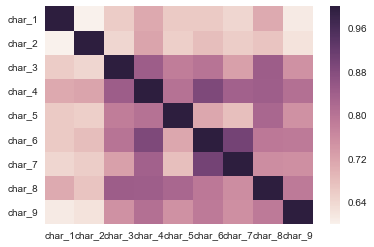

In [22]:
corr_heat = new_train.iloc[:,3:12]
ax = sns.heatmap(corr_heat.corr())

In [11]:
new_user = parse_category(user_raw)
del user_raw
new_user.head()

,people_id,char_1,group_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,...,char_33,char_34,char_35,char_36,char_37,char_38,year,month,day,weekend
0,ppl_100,2,17304,2,5,5,5,3,11,2,...,False,True,True,True,False,36,2021,6,29,False
1,ppl_100002,2,8688,3,28,9,5,3,11,2,...,True,True,True,True,False,76,2021,1,6,False
2,ppl_100003,2,33592,3,4,8,5,2,5,2,...,True,True,False,True,True,99,2022,6,10,False
3,ppl_100004,2,22593,3,40,25,9,4,16,2,...,True,True,True,True,True,76,2022,7,20,False
4,ppl_100006,2,6534,3,40,25,9,3,8,2,...,False,False,True,True,False,84,2022,7,27,False


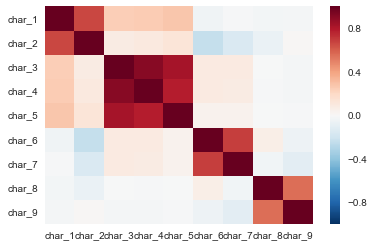

In [28]:
corr_heat2 = new_user.iloc[:,1:11]
corr_heat2 = corr_heat2.drop('group_1',axis = 1)
ax2 = sns.heatmap(corr_heat2.corr())

* To develop a predictive model with this data, what I need to do is to join the files together into a single data set. The two files can be joined together using person_id as the common key. In this project, I used people file to left join the activity files. Since there are duplicated features, so some features from activity file are marked as 'x' as postfix, and 'y' for features from people file.

In [12]:
train_data = pd.merge(new_train, new_user,on = 'people_id',how = 'left')
del new_train
train_data.head()

,people_id,activity_id,activity_category,char_1_x,char_2_x,char_3_x,char_4_x,char_5_x,char_6_x,char_7_x,...,char_33,char_34,char_35,char_36,char_37,char_38,year_y,month_y,day_y,weekend_y
0,ppl_100,act2_1734928,4,0,0,0,0,0,0,0,...,False,True,True,True,False,36,2021,6,29,False
1,ppl_100,act2_2434093,2,0,0,0,0,0,0,0,...,False,True,True,True,False,36,2021,6,29,False
2,ppl_100,act2_3404049,2,0,0,0,0,0,0,0,...,False,True,True,True,False,36,2021,6,29,False
3,ppl_100,act2_3651215,2,0,0,0,0,0,0,0,...,False,True,True,True,False,36,2021,6,29,False
4,ppl_100,act2_4109017,2,0,0,0,0,0,0,0,...,False,True,True,True,False,36,2021,6,29,False


In [13]:
test_data = pd.merge(new_test, new_user,on = 'people_id',how = 'left')
del new_test
del new_user
test_data.head()

,people_id,activity_id,activity_category,char_1_x,char_2_x,char_3_x,char_4_x,char_5_x,char_6_x,char_7_x,...,char_33,char_34,char_35,char_36,char_37,char_38,year_y,month_y,day_y,weekend_y
0,ppl_100004,act1_249281,1,5,10,5,1,6,1,1,...,True,True,True,True,True,76,2022,7,20,False
1,ppl_100004,act2_230855,5,0,0,0,0,0,0,0,...,True,True,True,True,True,76,2022,7,20,False
2,ppl_10001,act1_240724,1,12,1,5,4,6,1,1,...,True,True,True,True,True,90,2022,10,14,False
3,ppl_10001,act1_83552,1,20,10,5,4,6,1,1,...,True,True,True,True,True,90,2022,10,14,False
4,ppl_10001,act2_1043301,5,0,0,0,0,0,0,0,...,True,True,True,True,True,90,2022,10,14,False


In [14]:
len(train_data)

2197291

In [15]:
train_data['char_10_x'].value_counts()[:10]

1      904683
23     200408
0      157615
2      116191
61      35417
452     23513
489     23471
52      19515
481     18019
433     17282
Name: char_10_x, dtype: int64

In [16]:
(train_data['char_10_x'].value_counts() == 1).sum()

783

In [17]:
len(train_data['char_10_x'].unique())

6516

In [18]:
(train_data['group_1'].value_counts() == 1).sum()

2959

In [19]:
len(train_data['group_1'].unique())

29899

### Initial findings
<br>I checked all features from the training and testing dataset I built. All other features look right in statistics, except for char_10 from activity file and group_1 from people file. These two features contain a large number of unique variables. Besides, there are about 10% of the variables appear only once. These cases look like a outlier in the model, so it may increases the accuracy if they are well handled before training.<br/>

## 4. Predictive Model Building
<br>In this section, I will try to build a classification model to identifies which customers have the most potential business value, and improve the performance by modifying parameters and selection on features.<br/>

### 4.1 Model Selection
<br>There are several categorical features, which means I will need more features for one-hot encoding, the size of feature map would be extremly big and sparse. Considering such condition, I would prefer using a decision tree classifier. At the very beginning, I considered a random forest model would be fit for it, because there are several advantagse of using random forest in this case:<br/>
* Random Forest performs better on a data set in high dimension than a linear classifier.
* Random Forest can handle a data set in high dimension without feature selection.
* Also, it can provide features importance ranking after training, which allows me discovering facts and removing some unnecessary features for more accurate results.
* Random Forest needs less time on training than most of other classifiers.
* The generalization error of random forest is unbiased, so it has a better generalization ability to fit the model.
* etc.

### 4.2 Feature Selection
<br>For training purpose, I would try to use as many features as possible to train the model first. Once I have finished the training process, I can evaluate the result and decide how to parse the feature matrix.<br/>
<br>Before training, I have to remove features that are not necessary for training. The feature matrix will be sorted using 'people_id' as key, and the labels will be recorded in an array after that, so that the label and the data sets won't be messed up.<br/>
<br>As mentioned before, there are two features do not seem to be necessary to be trained in the model. Although using random forest model, which means removing features won't affect the result too much, I will still try to remove those features after first training, and comparing the results.<br/>

* Recording the outcome into 'y'
* Dropping unnecessary columns

In [20]:
X = train_data.sort_values('people_id')
y = np.where(train_data.outcome == 0, 0, 1)
X = X.drop(['people_id','activity_id','outcome'],axis = 1)
X.head()

,activity_category,char_1_x,char_2_x,char_3_x,char_4_x,char_5_x,char_6_x,char_7_x,char_8_x,char_9_x,...,char_33,char_34,char_35,char_36,char_37,char_38,year_y,month_y,day_y,weekend_y
0,4,0,0,0,0,0,0,0,0,0,...,False,True,True,True,False,36,2021,6,29,False
1,2,0,0,0,0,0,0,0,0,0,...,False,True,True,True,False,36,2021,6,29,False
2,2,0,0,0,0,0,0,0,0,0,...,False,True,True,True,False,36,2021,6,29,False
3,2,0,0,0,0,0,0,0,0,0,...,False,True,True,True,False,36,2021,6,29,False
4,2,0,0,0,0,0,0,0,0,0,...,False,True,True,True,False,36,2021,6,29,False


In [21]:
X_test = test_data.sort_values('people_id')
test_id = test_data[['people_id','activity_id']]
X_test = X_test.drop(['people_id','activity_id'],axis = 1)
X_test.head()

,activity_category,char_1_x,char_2_x,char_3_x,char_4_x,char_5_x,char_6_x,char_7_x,char_8_x,char_9_x,...,char_33,char_34,char_35,char_36,char_37,char_38,year_y,month_y,day_y,weekend_y
0,1,5,10,5,1,6,1,1,7,4,...,True,True,True,True,True,76,2022,7,20,False
1,5,0,0,0,0,0,0,0,0,0,...,True,True,True,True,True,76,2022,7,20,False
26,5,0,0,0,0,0,0,0,0,0,...,True,True,True,True,True,90,2022,10,14,False
25,5,0,0,0,0,0,0,0,0,0,...,True,True,True,True,True,90,2022,10,14,False
24,5,0,0,0,0,0,0,0,0,0,...,True,True,True,True,True,90,2022,10,14,False


* Seperate columns into categorical or non-categorical features for future processing
* Apply one-hot encoding to all categorical features

In [22]:
categorical = ['group_1','activity_category','char_1_x','char_2_x','char_3_x','char_4_x','char_5_x','char_6_x','char_7_x','char_8_x','char_9_x','char_10_x','char_1_y','char_2_y','char_3_y','char_4_y','char_5_y','char_6_y','char_7_y','char_8_y','char_9_y']
not_categorical = []
for category in X.columns:
    if category not in categorical:
        not_categorical.append(category)

In [23]:
enc = OneHotEncoder(handle_unknown='ignore')
enc = enc.fit(pd.concat([X[categorical],X_test[categorical]]))
X_cat_sparse=enc.transform(X[categorical])
X_test_cat_sparse=enc.transform(X_test[categorical])

In [24]:
from scipy.sparse import hstack
X_sparse=hstack((X[not_categorical].astype(float), X_cat_sparse))
X_test_sparse=hstack((X_test[not_categorical].astype(float), X_test_cat_sparse))
del X_cat_sparse
del X_test_cat_sparse

* After processing, the feature map becomes a matrix with over 40,000 columns to be trained.

In [25]:
print("Training data: " + format(X_sparse.shape))
print("Test data: " + format(X_test_sparse.shape))
print("Labels: " + format(y.shape))

Training data: (2197291, 41536)
Test data: (498687, 41536)
Labels: (2197291,)


### 4.3 Apply a Gradient Boosting model - XGBoost
<br>As founded above, the training data set is extremely large and sparse to be trained. In this case, even using random forest model (sklearn.ensemble.RandomForestClassifier) from sklearn spent lots of time and failed to train at the end. <br/>
<br>In order to train this model, I research and found another powerful model, which is XGBoost. XGBoost (eXtreme Gradient Boosting) is one of the most loved machine learning algorithms at Kaggle. It can be used for supervised learning tasks such as Regression, Classification, and Ranking. It is built on the principles of gradient boosting framework and designed to "push the extreme of the computation limits of machines to provide a scalable, portable and accurate library."<br/>
<br>XGBoost is one of the implementations of Gradient Boosting concept, but what makes XGBoost unique is that it uses "a more regularized model formalization to control over-fitting, which gives it better performance," according to the author of the algorithm, Tianqi Chen. Therefore, it helps to reduce overfitting.<br/>

In [26]:
import os

mingw_path = 'C:\\Program Files\\mingw-w64\\MinGW\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

import xgboost as xgb

In [27]:
dtrain = xgb.DMatrix(X_sparse,label=y)
dtest = xgb.DMatrix(X_test_sparse)

In [28]:
param = {'max_depth':10, 'eta':0.02, 'silent':1, 'objective':'binary:logistic' }
param['nthread'] = 4
param['eval_metric'] = 'auc'
param['subsample'] = 0.7
param['colsample_bytree']= 0.7
param['min_child_weight'] = 0
param['booster'] = "gblinear"

In [ ]:
watchlist  = [(dtrain,'train')]
num_round = 300
early_stopping_rounds=10
bst = xgb.train(param, dtrain, num_round, watchlist,early_stopping_rounds=early_stopping_rounds)

In [30]:
ypred = bst.predict(dtest)
output_float = pd.DataFrame({ 'activity_id' : test_id['activity_id'], 'outcome': ypred })
output_float.head()

,activity_id,outcome
0,act1_249281,0.001656
1,act2_230855,0.009198
2,act1_240724,0.999797
3,act1_83552,0.999796
4,act2_1043301,0.999794


In [31]:
output_int = pd.DataFrame({ 'activity_id' : test_id['activity_id'], 'outcome': ypred })
output_int.outcome = (output_int.outcome >= 0.5).astype(int)
output_int.head()

,activity_id,outcome
0,act1_249281,0
1,act2_230855,0
2,act1_240724,1
3,act1_83552,1
4,act2_1043301,1


In [32]:
output_float.to_csv('sub_float.csv', index = False)

In [33]:
output_int.to_csv('sub_int.csv', index = False)

* The score of first running is 0.978532
* If I modify the outcome into boolean values, the score is 0.910935

### Dropping 'char_10' feature (have to reload the data)

In [23]:
X = X.drop(['char_10_x'],axis = 1)
X_test = X_test.drop(['char_10_x'],axis = 1)

In [25]:
categorical = ['group_1','activity_category','char_1_x','char_2_x','char_3_x','char_4_x','char_5_x','char_6_x','char_7_x','char_8_x','char_9_x','char_1_y','char_2_y','char_3_y','char_4_y','char_5_y','char_6_y','char_7_y','char_8_y','char_9_y']
not_categorical = []
for category in X.columns:
    if category not in categorical:
        not_categorical.append(category)

In [26]:
enc = OneHotEncoder(handle_unknown='ignore')
enc = enc.fit(pd.concat([X[categorical],X_test[categorical]]))
X_cat_sparse=enc.transform(X[categorical])
X_test_cat_sparse=enc.transform(X_test[categorical])

from scipy.sparse import hstack
X_sparse=hstack((X[not_categorical].astype(float), X_cat_sparse))
X_test_sparse=hstack((X_test[not_categorical].astype(float), X_test_cat_sparse))
del X_cat_sparse
del X_test_cat_sparse

* There are about 7,000 features dropped from the initial feature map.

In [27]:
print("Training data: " + format(X_sparse.shape))
print("Test data: " + format(X_test_sparse.shape))
print("Labels: " + format(y.shape))

Training data: (2197291, 34566)
Test data: (498687, 34566)
Labels: (2197291,)


In [28]:
import os

mingw_path = 'C:\\Program Files\\mingw-w64\\MinGW\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

import xgboost as xgb

In [29]:
dtrain = xgb.DMatrix(X_sparse,label=y)
dtest = xgb.DMatrix(X_test_sparse)

In [30]:
param = {'max_depth':10, 'eta':0.02, 'silent':1, 'objective':'binary:logistic' }
param['nthread'] = 4
param['eval_metric'] = 'auc'
param['subsample'] = 0.7
param['colsample_bytree']= 0.7
param['min_child_weight'] = 0
param['booster'] = "gblinear"

In [ ]:
watchlist  = [(dtrain,'train')]
num_round = 300
early_stopping_rounds=10
bst = xgb.train(param, dtrain, num_round, watchlist,early_stopping_rounds=early_stopping_rounds)

In [32]:
ypred = bst.predict(dtest)
output_float = pd.DataFrame({ 'activity_id' : test_id['activity_id'], 'outcome': ypred })
output_float.head()

,activity_id,outcome
0,act1_249281,0.001657
1,act2_230855,0.001693
2,act1_240724,0.999507
3,act1_83552,0.999505
4,act2_1043301,0.999498


In [33]:
output_float.to_csv('sub_float_2.csv', index = False)

* The score is 0.979360 if 'char_10' is dropped.

### Dropping 'group_1' feature (have to reload the data)

In [22]:
X = X.drop(['group_1'],axis = 1)
X_test = X_test.drop(['group_1'],axis = 1)

categorical = ['activity_category','char_1_x','char_2_x','char_3_x','char_4_x','char_5_x','char_6_x','char_7_x','char_8_x','char_9_x','char_10_x','char_1_y','char_2_y','char_3_y','char_4_y','char_5_y','char_6_y','char_7_y','char_8_y','char_9_y']
not_categorical = []
for category in X.columns:
    if category not in categorical:
        not_categorical.append(category)

In [23]:
enc = OneHotEncoder(handle_unknown='ignore')
enc = enc.fit(pd.concat([X[categorical],X_test[categorical]]))
X_cat_sparse=enc.transform(X[categorical])
X_test_cat_sparse=enc.transform(X_test[categorical])

from scipy.sparse import hstack
X_sparse=hstack((X[not_categorical].astype(float), X_cat_sparse))
X_test_sparse=hstack((X_test[not_categorical].astype(float), X_test_cat_sparse))
del X_cat_sparse
del X_test_cat_sparse

* There are about 34,000 features dropped from the initial feature map.

In [24]:
print("Training data: " + format(X_sparse.shape))
print("Test data: " + format(X_test_sparse.shape))
print("Labels: " + format(y.shape))

Training data: (2197291, 7312)
Test data: (498687, 7312)
Labels: (2197291,)


In [25]:
import os

mingw_path = 'C:\\Program Files\\mingw-w64\\MinGW\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

import xgboost as xgb

In [26]:
dtrain = xgb.DMatrix(X_sparse,label=y)
dtest = xgb.DMatrix(X_test_sparse)

In [27]:
param = {'max_depth':10, 'eta':0.02, 'silent':1, 'objective':'binary:logistic' }
param['nthread'] = 4
param['eval_metric'] = 'auc'
param['subsample'] = 0.7
param['colsample_bytree']= 0.7
param['min_child_weight'] = 0
param['booster'] = "gblinear"

In [ ]:
watchlist  = [(dtrain,'train')]
num_round = 300
early_stopping_rounds=10
bst = xgb.train(param, dtrain, num_round, watchlist,early_stopping_rounds=early_stopping_rounds)

In [29]:
ypred = bst.predict(dtest)
output_float = pd.DataFrame({ 'activity_id' : test_id['activity_id'], 'outcome': ypred })
output_float.head()

,activity_id,outcome
0,act1_249281,0.639782
1,act2_230855,0.669588
2,act1_240724,0.777814
3,act1_83552,0.762170
4,act2_1043301,0.758834


In [31]:
output_float.to_csv('sub_float_3.csv', index = False)

* The score is 0.903638 if 'group_1' is dropped.

## 5. Observations and Conclusion
<br>There are several observations after running XGBoost model on the data set,<br/>
* The model was trained with all available features for the first time running, and the score is 0.978532 and I considered it as the baseline score.
* If I modify the outcome into boolean values, the score drops much. I think that is because the submissions are evaluated on area under the ROC curve between the predicted and the observed outcome. The penalty is larger if predicted wrong in this case.
* I dropped one of the feature 'char_10' from activity file, which was unnecessary in my opinion after I reserach the data set. The score was 0.979360, which is a little bit higher than the baseline score.
* But if I dropped another feature 'group_1', the score dropped greatly to 0.903638. Combining the finding above, the first reason could be I dropped too many features from the feature map (from 41,000 to 7000), which makes the model lost too much infomation. The second reason is that this is also a important feature in the previous trained model. (There are some installation problems, so I am not able to plot the feature importance list.)

<br>After all, the best score I got is 0.979, which is close to the leaderboard and this is a great score for me. If further improvement is desired, more time can be spent on adjusting parameters, or parsing the feature matrix, for example, modifying unique terms into the same category, which may help for better model performance.<br/>